# Module 2

In [85]:
import math
import os
import re

import pandas as pd
import simplejson
import seaborn as sns

In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.

In [87]:
# 2.1 Load the week2.csv file into a dataframe.
week2_filename = '../../data_output/module_1/week2-python.csv'
dataframe = pd.read_csv( week2_filename, parse_dates=['Date'] )  # parse_dates=['Date'] cast to Timestamp

# Convert the Date column to the index of the dataframe.
dataframe.set_index('Date', inplace=True, drop=False)

In [134]:
dataframe.head()

,Unnamed: 0,Symbol,Series,Date,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No_of_Trades,Deliverable_Qty,Percent_Dly_Qt_to_Traded_Qty,Date_Year,Date_Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,MUTHOOTFIN,EQ,2017-05-15,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,2017,5,0.00,Slight
2017-05-16,2,MUTHOOTFIN,EQ,2017-05-16,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,2017,5,0.01,Slight
2017-05-17,6,MUTHOOTFIN,EQ,2017-05-17,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,2017,5,0.00,Slight
2017-05-18,8,MUTHOOTFIN,EQ,2017-05-18,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,2017,5,-0.04,Slight
2017-05-19,10,MUTHOOTFIN,EQ,2017-05-19,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,2017,5,-0.00,Slight


In [131]:
# What is the type of the Date column? 
dataframe['Date'].dtypes   # dtype('<M8[ns]')
dataframe.dtypes[:'Date']  # Date: datetime64[ns]

Unnamed: 0             int64
Symbol                object
Series                object
Date          datetime64[ns]
dtype: object

In [132]:
dataframe['Series'].unique()  # Only EQ Series Stocks are sleected | Graph get messed up with multiple series types 

array(['EQ'], dtype=object)

Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

In [133]:
df_close_price_per_day = dataframe['Close_Price'].groupby('Date').last().to_frame()
df_close_price_per_day['Date'] = df_close_price_per_day.index
df_close_price_per_day.head()

,Close_Price,Date
Date,,
2017-05-15,392.45,2017-05-15
2017-05-16,394.80,2017-05-16
2017-05-17,395.15,2017-05-17
2017-05-18,379.20,2017-05-18
2017-05-19,379.15,2017-05-19


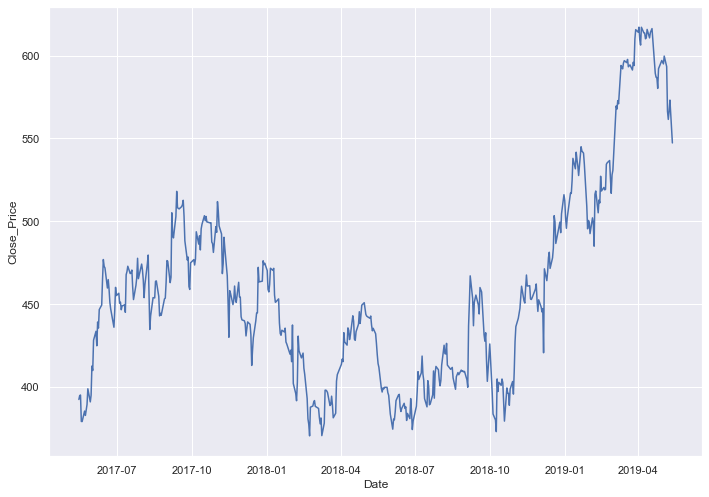

In [109]:
sns.lineplot(x="Date", y="Close_Price", data=df_close_price_per_day )

Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.

In [126]:
dataframe['Day_Perc_Change'].sort_values().head()

Date
2018-02-02   -0.08
2018-12-06   -0.06
2018-10-19   -0.06
2018-09-24   -0.06
2017-08-09   -0.05
Name: Day_Perc_Change, dtype: float64

- 2018-12-06 - [Muthoot Finance Q2 profit rises 9% to Rs 484 cr, AUM grows 21](https://www.moneycontrol.com/news/business/earnings/muthoot-finance-q2-profit-rises-9-to-rs-484-cr-aum-grows-21-3260721.html)
- 2018-09-24 - [Asset-liability mismatch at comfortable level, says Muthoot Finance](https://www.cnbctv18.com/videos/finance/asset-liability-mismatch-at-comfortable-level-says-muthoot-finance-900111.htm)
- 2017-08-09 - [Kerala Goods and Services Tax Bill introduced in Assembly](https://timesofindia.indiatimes.com/business/india-business/kerala-goods-and-services-tax-bill-introduced-in-assembly/articleshow/59988338.cms)

In [137]:
dataframe['Day_Perc_Change'].sort_values().tail()

Date
2017-11-16    0.07
2017-09-06    0.08
2018-10-10    0.09
2018-09-05    0.09
2018-12-07    0.12
Name: Day_Perc_Change, dtype: float64

- 2018-12-07 - [Muthoot Finance will consider more fund raising via NCDs: George Alexander Muthoot](https://economictimes.indiatimes.com/markets/expert-view/muthoot-finance-will-now-look-at-more-fund-raising-through-ncd-route-george-alexander-muthoot/articleshow/66986536.cms)
- 2018-09-05 - [Muthoot Finance Q1 net profit rises 43% at ₹492 crore](https://www.thehindubusinessline.com/money-and-banking/muthoot-finance-q1-net-profit-rises-43-at-492-crore/article24874199.ece)

